In [56]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import KernelPCA, PCA

from factor_analyzer import FactorAnalyzer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn import preprocessing  
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [57]:
df = pd.read_excel('outlier.xlsx')
X_input = df.dropna()
scaler = MinMaxScaler()
X_input = scaler.fit_transform(X_input)
X_input = pd.DataFrame(X_input)
X_input.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness","Scaled sound pressure level","label"] #添加自定义的columns的名字


In [58]:
X_input

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level,label
0,1.000000,0.0,0.0,1.0,0.0,0.000000,0.0
1,1.000000,0.0,0.0,1.0,0.0,0.000000,0.0
2,0.032258,0.0,0.0,0.0,1.0,0.942164,1.0
3,0.019355,0.0,0.0,0.0,1.0,1.000000,1.0
4,0.774194,0.0,0.0,1.0,0.0,0.181771,0.0
...,...,...,...,...,...,...,...
101,0.000000,0.0,0.0,0.0,1.0,0.913762,1.0
102,0.000000,0.0,0.0,0.0,1.0,0.913762,1.0
103,0.000000,0.0,0.0,0.0,1.0,0.913762,1.0
104,0.774194,0.0,0.0,1.0,0.0,0.181771,0.0


In [59]:
X = X_input.iloc[:,0:5]

y = X_input.iloc[:,5]

In [60]:
X

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
0,1.000000,0.0,0.0,1.0,0.0
1,1.000000,0.0,0.0,1.0,0.0
2,0.032258,0.0,0.0,0.0,1.0
3,0.019355,0.0,0.0,0.0,1.0
4,0.774194,0.0,0.0,1.0,0.0
...,...,...,...,...,...
101,0.000000,0.0,0.0,0.0,1.0
102,0.000000,0.0,0.0,0.0,1.0
103,0.000000,0.0,0.0,0.0,1.0
104,0.774194,0.0,0.0,1.0,0.0


In [61]:
y

0      0.000000
1      0.000000
2      0.942164
3      1.000000
4      0.181771
         ...   
101    0.913762
102    0.913762
103    0.913762
104    0.181771
105    0.913762
Name: Scaled sound pressure level, Length: 106, dtype: float64

In [86]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = sm.add_constant(X) 
model = sm.OLS(y, x).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.993
Model:                                     OLS   Adj. R-squared:                  0.993
Method:                          Least Squares   F-statistic:                     7841.
Date:                         Sun, 07 May 2023   Prob (F-statistic):          2.82e-113
Time:                                 15:51:33   Log-Likelihood:                 224.37
No. Observations:                          106   AIC:                            -442.7
Df Residuals:                              103   BIC:                            -434.8
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [87]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10) #

In [88]:
mean_squared_error(y_test,model.predict(x_test))

0.0008493298043005843

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [53]:

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) #
ridge=Ridge(alpha=0.4)
ridge.fit(X_train,y_train)
print("Training dataset score："+str(r2_score(y_train,ridge.predict(X_train))))
print("Testing dataset score："+str(r2_score(y_test,ridge.predict(x_test))))
print("Training dataset MSE："+str(mean_squared_error(y_train,ridge.predict(X_train))))
print("Testing dataset MSE："+str(mean_squared_error(y_test,ridge.predict(x_test))))


Training dataset score：0.9904519037881838
Testing dataset score：0.9881593044716772
Training dataset MSE：0.0012856611641436796
Testing dataset MSE：0.0013671572655292426


In [29]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split


# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# perform Lasso regression with cross-validation
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

# evaluate the model on the test set
train_score=lasso_cv.score(X_train, y_train)
test_score = lasso_cv.score(X_test, y_test)
print("Training dataset score："+str(train_score))
print("Testing dataset score："+str(test_score))
print("Training dataset MSE："+str(mean_squared_error(y_train,lasso_cv.predict(X_train))))
print("Testing dataset MSE："+str(mean_squared_error(y_test,lasso_cv.predict(X_test))))

Training dataset score：0.9927860872806622
Testing dataset score：0.9953995818654259
Training dataset MSE：0.0008786854918331837
Testing dataset MSE：0.000744608752180027


In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [69]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 
from sklearn.preprocessing import MinMaxScaler
# Training dataset MinMaxSscaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
y_train=y_train.values.reshape(-1,1)
min_max_scaler.fit(y_train)
y_train = min_max_scaler.transform(y_train)
# Testing dataset MinMaxSscaler
min_max_scaler.fit(x_test)
x_test = min_max_scaler.transform(x_test)
y_test=y_test.values.reshape(-1,1)
min_max_scaler.fit(y_test)
y_test = min_max_scaler.transform(y_test)

In [70]:
#Decision Tree
DTR = DecisionTreeRegressor(max_depth=30)
DTR.fit(X_train,y_train)
y_pre_DTR = DTR.predict(x_test)
DTR_score=r2_score(y_test,y_pre_DTR)
print(DTR_score)
print(mean_squared_error(y_test,y_pre_DTR))

0.9891789826764873
0.0012494225882990566


In [71]:
#SVR
SUPPOT = SVR()
SUPPOT.fit(X_train,y_train)
y_pre_SVR = SUPPOT.predict(x_test)
SVR_score=r2_score(y_test,y_pre_SVR)
print(SVR_score)
print(mean_squared_error(y_test,y_pre_SVR))

0.9669859661593949
0.003811885553652508


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
#Randomforest
rf = RandomForestRegressor(n_estimators=30,max_depth=20)
rf.fit(X_train,y_train)
y_pre_rf = rf.predict(x_test)
rf_score=r2_score(y_test,y_pre_rf)
print(rf_score)
print(mean_squared_error(y_test,y_pre_rf))

0.9905550249546016
0.0010905411954197893


C:\Users\jingu\AppData\Local\Temp/ipykernel_11164/2182861441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [73]:
#AdaBoostRegression
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pre_adb = adb.predict(x_test)
adb_score=r2_score(y_test,y_pre_adb)
print(adb_score)
print(mean_squared_error(y_test,y_pre_adb))

0.9883741224798073
0.001342353823883515


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
#GradientBoostingRegression
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,y_train)
y_pre_gbtr = gbtr.predict(x_test)
gbtr_score=r2_score(y_test,y_pre_gbtr)
print(gbtr_score)
print(mean_squared_error(y_test,y_pre_gbtr))

0.9892610586708376
0.0012399458821602154


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
from sklearn.neural_network import MLPRegressor

In [80]:
train_score = []
test_score = []
layers = list(range(5,300,5)) 
for i in layers:
    MLP = MLPRegressor(activation = 'relu', 
                       solver = 'sgd', 
                       hidden_layer_sizes = (i,), 
                       alpha=1e-2, 
                       max_iter = 400,
                       learning_rate_init = 0.1)
    MLP.fit(X_train,y_train)
    train_score.append(MLP.score(X_train,y_train))
    test_score.append(MLP.score(x_test,y_test))

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y 

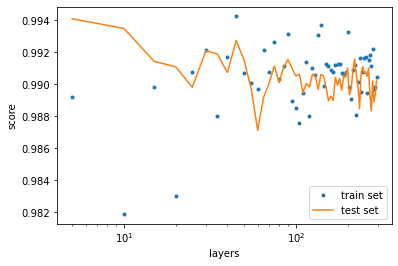

In [81]:
# Plot scores
plt.plot(layers,train_score,'.',label = 'train set')
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")

In [83]:
train_score = []
test_score = []
layers = list(range(5,300,5)) 
for i in layers:
    MLP = MLPRegressor(activation = 'relu', 
                       solver = 'sgd', 
                       hidden_layer_sizes = (i,), 
                       alpha=1e-2, 
                       max_iter = 400,
                       learning_rate_init = 0.1)
    MLP.fit(X_train,y_train)
    y_pre=MLP.predict(x_test)
    test_score.append(mean_squared_error(y_test,y_pre))

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y 

In [84]:
min(test_score)

0.0007849719193452449

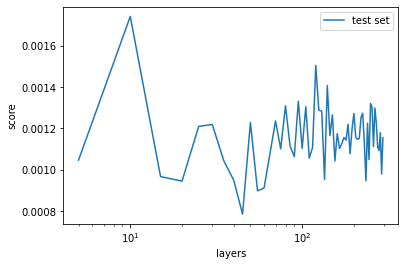

In [85]:
# Plot scores
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")